In [1]:
import pandas as pd

data_path = "data_preprocessed/1_txt_cleaning.csv"
df = pd.read_csv(data_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9499 entries, 0 to 9498
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             9499 non-null   object
 1   pub_year       9499 non-null   int64 
 2   text_preproc1  9499 non-null   object
dtypes: int64(1), object(2)
memory usage: 222.8+ KB


In [5]:
import sys
sys.path.append('../..')

from src.moduls.pipeline_en import spacy_tags

In [6]:
from parallel_pandas import ParallelPandas

#initialize parallel-pandas
ParallelPandas.initialize(n_cpu=20, split_factor=1, disable_pr_bar=False)

df['tags'] = df['text_preproc1'].p_apply(spacy_tags)

SPACY_TAGS DONE:   0%|          | 0/9499 [00:00<?, ?it/s]

In [7]:
# Flatten the lists of lists into individual rows
exploded_tags = df.explode('tags')

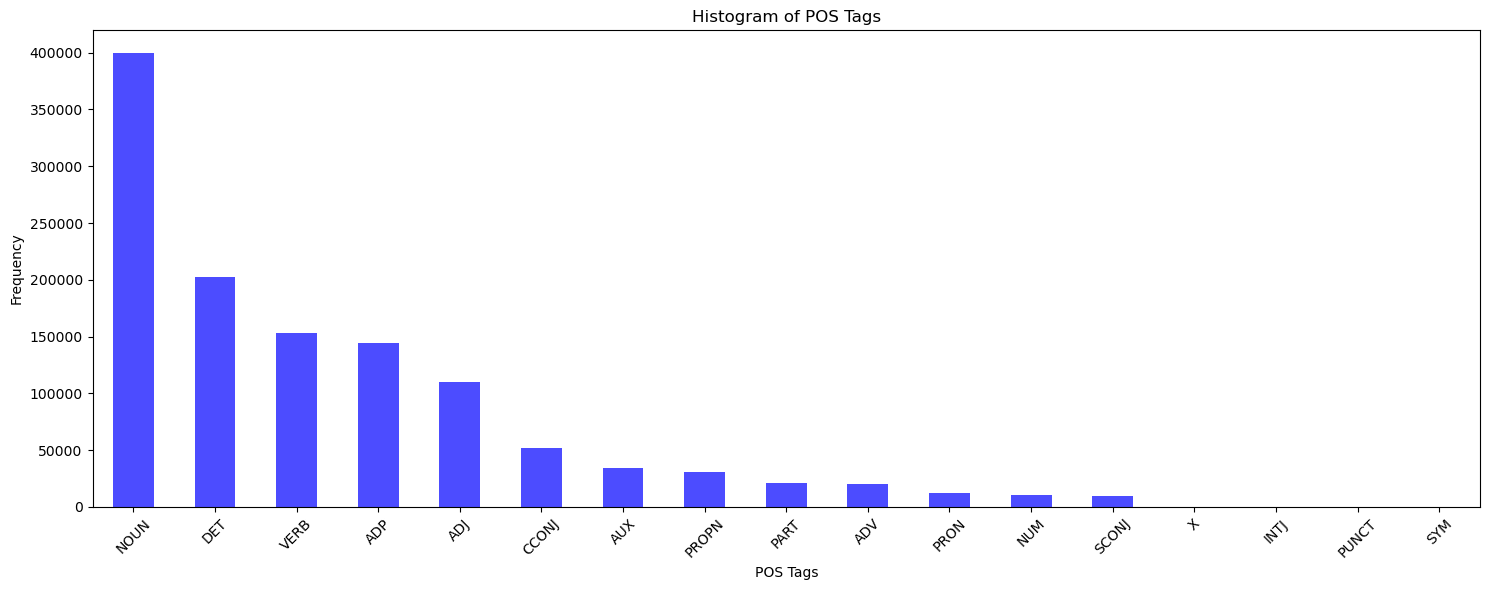

In [8]:
import matplotlib.pyplot as plt

# Extract the second and third items
exploded_tags['text'] = exploded_tags['tags'].apply(lambda x: x[0] if isinstance(x, list) else "UNKNOWN")
exploded_tags['pos'] = exploded_tags['tags'].apply(lambda x: x[1] if isinstance(x, list) else "UNKNOWN")

# Count the frequency of each POS and TAG
pos_counts = exploded_tags['pos'].value_counts()

# Plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Plot POS histogram
pos_counts.plot(kind='bar', ax=ax, color='blue', alpha=0.7)
ax.set_xlabel('POS Tags')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of POS Tags')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [9]:
# Group by `tag` and aggregate token texts
postag_token_groups = exploded_tags.groupby('pos')['text'].agg(set)

# Convert to DataFrame for better readability
postag_token_df = postag_token_groups.reset_index()
postag_token_df.columns = ['pos', 'token_texts']

# Set the `tag` column as index
postag_token_df.set_index('pos', inplace=True)

In [10]:
pd.set_option('display.max_colwidth', None)  # Show all data in columns
postag_token_df

,token_texts
pos,
ADJ,"{moving, undeployed, complexly, coaxial, attachable, electrocuetical, anticipatory, absorbent, extrudable, navigable, adhesive, caring, upper, irradiated, human, packet, hostile, absent, abstract, recipient, retracted, limbed, old, decorative, orchestrated, anthropometric, pivotable, diverter, free, simplified, unlimited, extensive, pick, exoskeletal, due, transitory, colorful, jointed, performed, maximum, microsurgical, deferred, hyper, bodied, spandrel, angular, appreciable, sensorized, dockable, driveable, rearward, equipped, redacted, booth, general, transverse, polyarticulated, receiver, printed, destacked, neural, pivoting, secure, connective, localized, side, sharp, rapid, depressed, physique, enlarged, related, femur, energized, endoluminar, smpd, solvent, curbside, hydrophilic, asphalt, potential, uttered, skive, passive, electrochemical, monofilament, unknown, centric, separable, satisfying, indicative, concave, fluid, mag, physic, multilingual, compound, parallel, interventional, weighted, ...}"
ADP,"{re, toward, after, mobility, until, with, via, over, within, abstract, de, electrode, without, across, based, up, due, of, atop, thru, below, amongst, opposite, chopper, along, per, like, than, such, versus, by, therefrom, obstacles, under, past, onto, against, v, underneath, agr, off, among, forth, forward, regarding, inflow, in, thereof, from, herewith, near, iv, through, whereupon, back, pk, onboard, as, throughout, therefor, above, out, therewith, including, beyond, to, wherein, together, resistant, behind, for, into, during, vs., structurefrom, inside, around, beside, astride, about, en, between, beneath, before, towards, at, down, alongside, away, tactile, outside, weld, on}"
ADV,"{thus, incredibly, statically, slideably, eccentrically, expediently, overlaps, properly, additively, integrally, intravenously, hardness, orthogonally, generically, globally, complimentarily, over, rigidly, retractably, rotatingly, tangentially, purely, interactively, last, hygienically, unintentionally, firstly, arbitrarily, up, carefully, sufficiently, presently, rapidly, maximum, furthermore, thereby, below, multidirectionally, deeply, too, consecutively, automatedly, immediately, alternatively, here, kinematically, differently, backwardly, most, semantically, bodily, transverse, just, permanently, receiver, infinitely, tiltedly, liftably, asynchronously, reversely, additionally, spherically, conductively, quantitatively, enough, precisely, internally, vertically, drastically, medically, personally, pivotally, entirely, operably, approximately, elliptically, later, cleaner, outward, energetically, successfully, electronically, elevatingly, strategically, broadly, threadably, exaggeratedly, parallel, capacitively, consequently, besides, initially, centrally, notifier, orderly, regularly, stably, perhaps, operationally, tattoo, ...}"
AUX,"{re, pre, vacuum, s, can, co, includes, navigates, becoming, might, have, should, getting, will, listens, m, becomes, do, gripped, shall, remaining, due, must, environment, get, would, may, could, include, having, to, need, be, exists, operable, testing, swing, ai, ref, remains, note, performs}"
CCONJ,"{automatic, neither, so, strand, n, either, anomalies, yet, minus, plus, nor, and, but, or, both}"
DET,"{every, which, this, no, twice, headstock, these, b, such, an, all, half, electrode, that, some, whose, those, couple, a, any, locally, the, each, either, another, yaw, both}"
INTJ,"{yes, human, weld, fine, well, by, zi, le, like, o}"
NOUN,"{setpoint, agv, client, stool, calibration, vertebrae, ram, magnitude, stomach, transitory, add, cyber, overshoot, satellite, irrigation, gonioscopy, comfort, subjects, advance, driveable, equipped, booth, phase, stabilizing, transferrer, fender, help, gladhand, writing, physique, replacement, orbit, jitter, lever, solvent, regulation, editor, cm, forging, parser, disinfector, pigment, detect, rainwater, centric, stamina, fluid, parallel, in